# 1) Importing Dataset and Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [2]:
house_data = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
house_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# Shape Of Dataset :
print("Dataset contains {} columns and {} rows.".format(house_data.shape[1],house_data.shape[0]))

Dataset contains 9 columns and 13320 rows.


# 2) Missing Values :

In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
house_data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

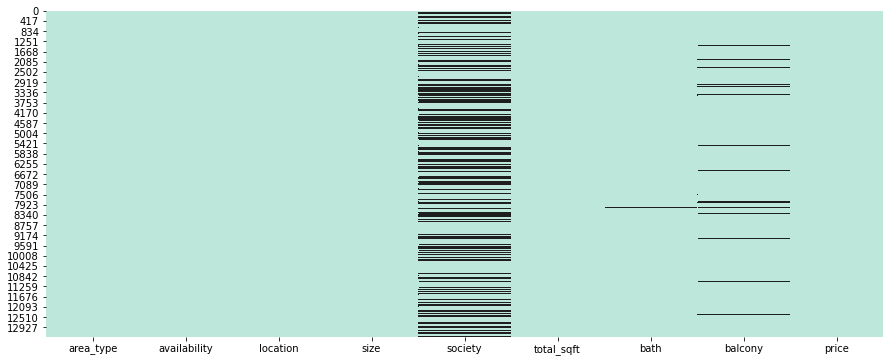

In [7]:
plt.figure(figsize=(15,6))
sns.heatmap(house_data.isnull(), cbar=False,center=1)
plt.show()

# 3) Target Variable :

In [8]:
house_data["price"].describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

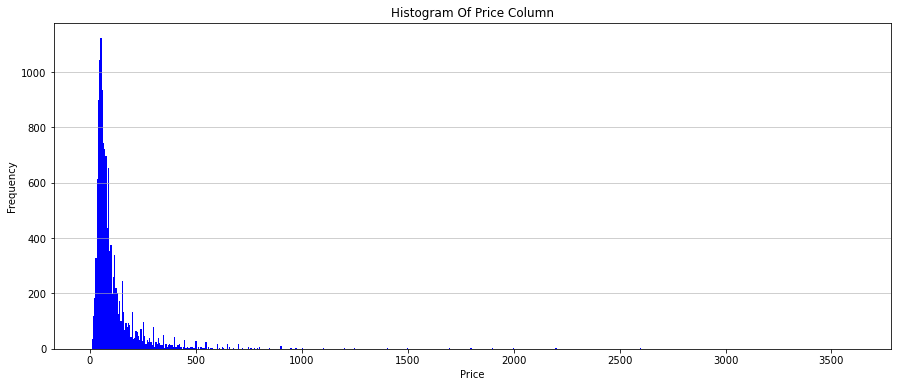

In [9]:
# Creating histogram
plt.figure(figsize=(15,6))
plt.hist(x=house_data["price"], bins='auto', color='blue', rwidth=1)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram Of Price Column')
plt.show()

# 4) Relationship Between Input and Output Variables :

In [10]:
house_data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

###  4.1) area_type :

In [11]:
house_data["area_type"].describe()

count                    13320
unique                       4
top       Super built-up  Area
freq                      8790
Name: area_type, dtype: object

In [12]:
house_data["area_type"].isnull().sum()
# No missing values.

0

In [13]:
house_data["area_type"].dtype
# Object Data-type

dtype('O')

In [14]:
house_data["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

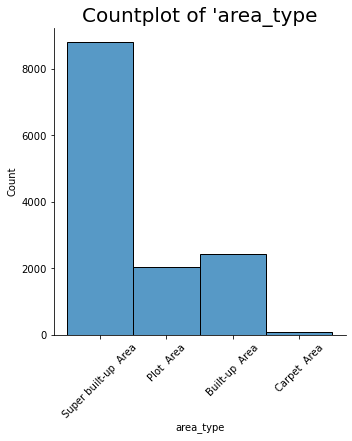

In [15]:
w = sns.displot(data=house_data, x="area_type")
w.set_xticklabels(rotation=45)
plt.title("Countplot of 'area_type", fontsize=20)
plt.show()

In [16]:
model = ols('house_data["price"]~house_data["area_type"]', data=house_data).fit()
anova_result = sm.stats.anova_lm(model, type=2)
p = anova_result["PR(>F)"][0]
alpha = 0.05

print("p value is " + str(p))
print("\n")

if p <= alpha:
    print('Target/output variable is Dependent on given input variable.')
    print('Hence, There is relationship between input and output variables.')
else:
    print('Independent')
    print('Hence, There is NO relationship between input and output variables.')

p value is 2.583085084870876e-225


Target/output variable is Dependent on given input variable.
Hence, There is relationship between input and output variables.


###  4.2) availability :

In [17]:
house_data["availability"].describe()

count             13320
unique               81
top       Ready To Move
freq              10581
Name: availability, dtype: object

In [18]:
house_data["availability"].isnull().sum()
# No missing values.

0

In [19]:
house_data["availability"].dtype
# Object Data-type

dtype('O')

In [20]:
house_data["availability"].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Dec               1
16-Nov               1
15-Aug               1
14-Jul               1
16-Jul               1
Name: availability, Length: 81, dtype: int64

In [21]:
# Chnaging Labels :
house_data["availability"][house_data["availability"]!="Ready To Move"]="Not Ready To Move"

In [22]:
house_data["availability"].value_counts()

Ready To Move        10581
Not Ready To Move     2739
Name: availability, dtype: int64

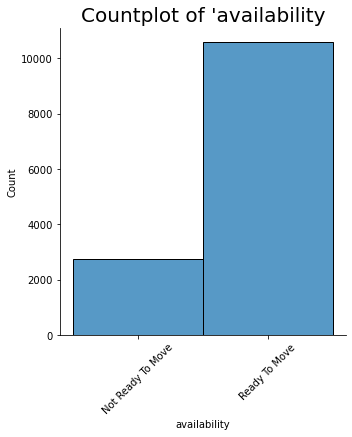

In [23]:
w = sns.displot(data=house_data, x="availability")
w.set_xticklabels(rotation=45)
plt.title("Countplot of 'availability", fontsize=20)
plt.show()

In [24]:
model = ols('house_data["price"]~house_data["availability"]', data=house_data).fit()
anova_result = sm.stats.anova_lm(model, type=2)
p = anova_result["PR(>F)"][0]
alpha = 0.05

print("p value is " + str(p))
print("\n")

if p <= alpha:
    print('Target/output variable is Dependent on given input variable.')
    print('Hence, There is relationship between input and output variables.')
else:
    print('Independent')
    print('Hence, There is NO relationship between input and output variables.')

p value is 6.875161555848967e-05


Target/output variable is Dependent on given input variable.
Hence, There is relationship between input and output variables.


###  4.3) location :

In [25]:
house_data["location"].describe()

count          13319
unique          1305
top       Whitefield
freq             540
Name: location, dtype: object

In [26]:
house_data["location"].isnull().sum()
# Missing value is Present.

1

In [27]:
# Repalcing Missing Value with Mode Value :
mod_Val = house_data["location"].mode()[0]
house_data["location"].fillna(value=mod_Val, inplace=True)
house_data["location"].isnull().sum()
# No missing values.

0

In [28]:
house_data["location"].dtype
# Object Data-type

dtype('O')

In [29]:
house_data["location"].value_counts()

Whitefield                    541
Sarjapur  Road                399
Electronic City               302
Kanakpura Road                273
Thanisandra                   234
                             ... 
Gayathri Nagar                  1
St Thomas Town                  1
BTM Layout 1stage 9th Main      1
Billapura                       1
CQAL LAYOUT C BLOCK             1
Name: location, Length: 1305, dtype: int64

In [30]:
house_data["location"] = house_data["location"].apply(lambda x : x.strip())
location_count = house_data["location"].value_counts()

In [31]:
location_count_less_10 = location_count[location_count<=10]

In [32]:
house_data["location"] = house_data["location"].apply(lambda x : "other" if x in location_count_less_10 else x)

In [33]:
model = ols('house_data["price"]~house_data["location"]', data=house_data).fit()
anova_result = sm.stats.anova_lm(model, type=2)
p = anova_result["PR(>F)"][0]
alpha = 0.05

print("p value is " + str(p))
print("\n")

if p <= alpha:
    print('Target/output variable is Dependent on given input variable.')
    print('Hence, There is relationship between input and output variables.')
else:
    print('Independent')
    print('Hence, There is NO relationship between input and output variables.')

p value is 1.385558472030792e-268


Target/output variable is Dependent on given input variable.
Hence, There is relationship between input and output variables.


###  4.4) size :

In [34]:
house_data["size"].describe()

count     13304
unique       31
top       2 BHK
freq       5199
Name: size, dtype: object

In [35]:
house_data["size"].isnull().sum()
# Missing values are Present.

16

In [36]:
# Repalcing Missing Value with Mode Value :
mod_Val = house_data["size"].mode()[0]
house_data["size"].fillna(value=mod_Val, inplace=True)
house_data["size"].isnull().sum()
# No missing values.

0

In [37]:
house_data["size"].dtype
# Object Data-type

dtype('O')

In [38]:
house_data["size"].value_counts()

2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
10 BHK           2
11 BHK           2
11 Bedroom       2
16 BHK           1
19 BHK           1
18 Bedroom       1
14 BHK           1
13 BHK           1
27 BHK           1
43 Bedroom       1
12 Bedroom       1
Name: size, dtype: int64

In [39]:
house_data["size"] = house_data["size"].apply(lambda x : x.strip())
size_count = house_data["size"].value_counts()

In [40]:
size_count_less_10 = size_count[size_count<=10]

In [41]:
house_data["size"] = house_data["size"].apply(lambda x : "other" if x in size_count_less_10 else x)

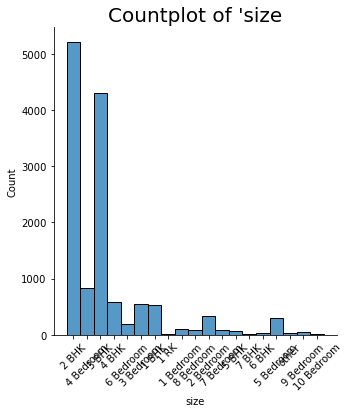

In [42]:
w = sns.displot(data=house_data, x="size")
w.set_xticklabels(rotation=45)
plt.title("Countplot of 'size", fontsize=20)
plt.show()

In [43]:
model = ols('house_data["price"]~house_data["size"]', data=house_data).fit()
anova_result = sm.stats.anova_lm(model, type=2)
p = anova_result["PR(>F)"][0]
alpha = 0.05

print("p value is " + str(p))
print("\n")

if p <= alpha:
    print('Target/output variable is Dependent on given input variable.')
    print('Hence, There is relationship between input and output variables.')
else:
    print('Independent')
    print('Hence, There is NO relationship between input and output variables.')

p value is 0.0


Target/output variable is Dependent on given input variable.
Hence, There is relationship between input and output variables.


###  4.5) society :

In [44]:
house_data["society"].describe()

count        7818
unique       2688
top       GrrvaGr
freq           80
Name: society, dtype: object

In [45]:
house_data["society"].isnull().sum()
# Missing values are Present.

5502

In [46]:
# As it contains more than 10% missing values, hence we drop such column.

In [47]:
house_data = house_data.drop("society", axis = 1)
house_data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Not Ready To Move,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [48]:
house_data.shape

(13320, 8)

###  4.6) total_sqft :

In [49]:
house_data["total_sqft"].value_counts()

1200           843
1100           221
1500           205
2400           196
600            180
              ... 
885              1
2236             1
2386             1
1180 - 1630      1
581.91           1
Name: total_sqft, Length: 2117, dtype: int64

In [50]:
def finding_mean(x):
    temp = x.split("-")
    if len(temp)==2 :
        return (float(temp[0])+float(temp[1]))/2
    try :
        return float(x)
    except :
        return None

In [51]:
# Chnaging Labels and Converting To Mean Value :
house_data["total_sqft"] = house_data["total_sqft"].apply(finding_mean)

In [52]:
house_data["total_sqft"].isnull().sum()
# Missing values are Present.

46

In [53]:
house_data["total_sqft"].dtype
# Object Data-type

dtype('float64')

In [54]:
mean_value= house_data["total_sqft"].mean() 
mean_value
house_data["total_sqft"].fillna(value=mean_value, inplace=True)

In [55]:
house_data["total_sqft"].isnull().sum()
# No missing values.

0

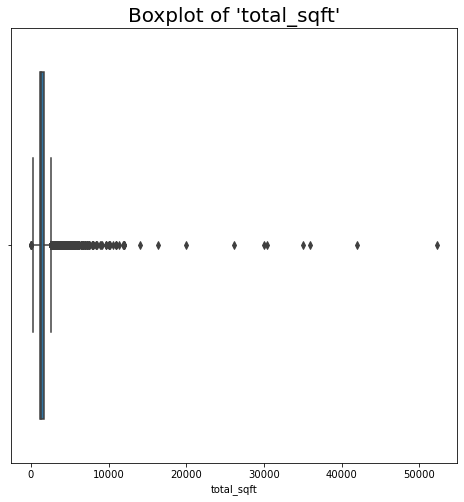

In [56]:
plt.figure(figsize=(8,8))
sns.boxplot(house_data["total_sqft"])
plt.title("Boxplot of 'total_sqft'", fontsize=20)
plt.show()

In [57]:
# Function for Outlier Treatment :
def treat_outlier(col) :
    qunt10,qunt1, qunt3, qunt90 = np.percentile(col, [10,25,75,90])
    iqr = qunt3 - qunt1
    lower_val = qunt1-(1.5*iqr)
    upper_val = qunt1+(1.5*iqr)
    for i, name in enumerate(col) :
        if(col[i]<lower_val) :
            col[i]=qunt10
        elif(col[i]>upper_val) :
            col[i]=qunt90
        else :
            col[i]=col[i]

In [58]:
# Outlier Treatment :
treat_outlier(house_data["total_sqft"])

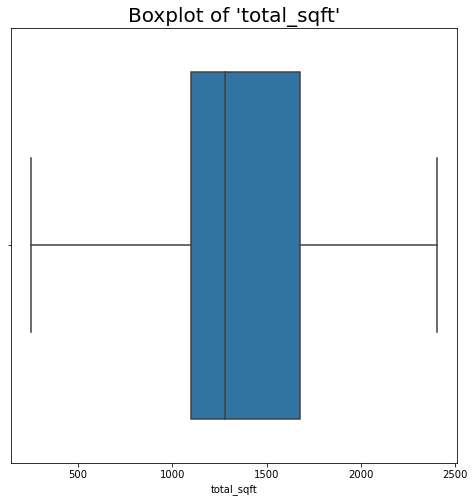

In [59]:
plt.figure(figsize=(8,8))
sns.boxplot(house_data["total_sqft"])
plt.title("Boxplot of 'total_sqft'", fontsize=20)
plt.show()

In [60]:
house_data["total_sqft"].describe()

count    13320.000000
mean      1428.780079
std        516.182226
min        250.000000
25%       1100.000000
50%       1279.500000
75%       1678.000000
max       2401.200000
Name: total_sqft, dtype: float64

In [61]:
# Spearman's rho
p = house_data["price"].corr(house_data["total_sqft"], method='spearman')
alpha = 0.70

print("Correlation Coefficient is " + str(p))
print("\n")

if p >= alpha:
    print('Target/output variable is Dependent on given input variable.')
    print('Hence, There is relationship between input and output variables.')
else:
    print('Independent')
    print('Hence, There is NO relationship between input and output variables.')

Correlation Coefficient is 0.7318276790542624


Target/output variable is Dependent on given input variable.
Hence, There is relationship between input and output variables.


###  4.7) bath :

In [62]:
house_data["bath"].describe()

count    13247.000000
mean         2.692610
std          1.341458
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

In [63]:
house_data["bath"].isnull().sum()
# Missing values are Present.

73

In [64]:
# Repalcing Missing Value with Mode Value :
mod_Val = house_data["bath"].mode()[0]
house_data["bath"].fillna(value=mod_Val, inplace=True)
house_data["bath"].isnull().sum()
# No missing values.

0

In [65]:
house_data["bath"].dtype
# Float Data-type

dtype('float64')

In [66]:
house_data["bath"].value_counts()

2.0     6981
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
11.0       3
13.0       3
16.0       2
14.0       1
40.0       1
18.0       1
27.0       1
15.0       1
Name: bath, dtype: int64

In [67]:
house_data["bath"] = house_data["bath"].astype(str)

In [68]:
house_data["bath"] = house_data["bath"].apply(lambda x : x.strip())
bath_count = house_data["bath"].value_counts()

In [69]:
bath_count_less_10 = bath_count[bath_count<=10]

In [70]:
house_data["bath"] = house_data["bath"].apply(lambda x : "other" if x in bath_count_less_10 else x)

In [71]:
house_data["bath"].value_counts()

2.0      6981
3.0      3286
4.0      1226
1.0       788
5.0       524
6.0       273
7.0       102
8.0        64
9.0        43
other      20
10.0       13
Name: bath, dtype: int64

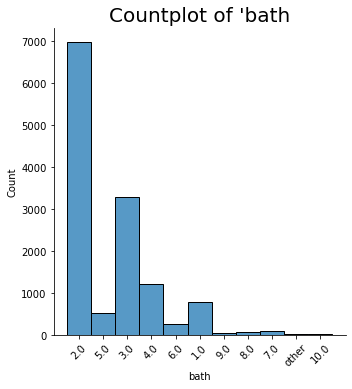

In [72]:
w = sns.displot(data=house_data, x="bath")
w.set_xticklabels(rotation=45)
plt.title("Countplot of 'bath", fontsize=20)
plt.show()

In [73]:
model = ols('house_data["price"]~house_data["bath"]', data=house_data).fit()
anova_result = sm.stats.anova_lm(model, type=2)
p = anova_result["PR(>F)"][0]
alpha = 0.05

print("p value is " + str(p))
print("\n")

if p <= alpha:
    print('Target/output variable is Dependent on given input variable.')
    print('Hence, There is relationship between input and output variables.')
else:
    print('Independent')
    print('Hence, There is NO relationship between input and output variables.')

p value is 0.0


Target/output variable is Dependent on given input variable.
Hence, There is relationship between input and output variables.


###  4.8) balcony :

In [74]:
house_data["balcony"].describe()

count    12711.000000
mean         1.584376
std          0.817263
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

In [75]:
house_data["balcony"].isnull().sum()
# Missing values are Present.

609

In [76]:
# As it contains more missing values, hence we drop such column.

In [77]:
house_data = house_data.drop("balcony", axis = 1)
house_data.head()

,area_type,availability,location,size,total_sqft,bath,price
0,Super built-up Area,Not Ready To Move,Electronic City Phase II,2 BHK,1056.0,2.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2401.2,5.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00


In [78]:
house_data.shape

(13320, 7)

In [79]:
data = house_data.copy()

# 5) : Encoding :

In [80]:
# Categorical Data
categorical_data = data.select_dtypes(include=np.object)
categorical_data.columns

Index(['area_type', 'availability', 'location', 'size', 'bath'], dtype='object')

In [81]:
categorical_data_encoded =pd.get_dummies(data=categorical_data,drop_first=True)
categorical_data_encoded.head()

,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Ready To Move,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,bath_10.0,bath_2.0,bath_3.0,bath_4.0,bath_5.0,bath_6.0,bath_7.0,bath_8.0,bath_9.0,bath_other
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [82]:
for col in categorical_data.columns :
    del data[col]

In [83]:
data = pd.concat([data, categorical_data_encoded], axis=1, join='inner')
data.head()

,total_sqft,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Ready To Move,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,...,bath_10.0,bath_2.0,bath_3.0,bath_4.0,bath_5.0,bath_6.0,bath_7.0,bath_8.0,bath_9.0,bath_other
0,1056.0,39.07,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2401.2,120.00,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1440.0,62.00,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1521.0,95.00,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1200.0,51.00,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [84]:
print("Shape of data :",data.shape)

Shape of data : (13320, 275)


In [85]:
house_data = data

# 5)  Train-Test Splitting :

In [86]:
X = house_data.drop(columns="price", axis=1)
Y = house_data["price"]

In [87]:
print("Shape of Input dataset : ", X.shape)
print("Shape of Output (Target) dataset : ", Y.shape)

Shape of Input dataset :  (13320, 274)
Shape of Output (Target) dataset :  (13320,)


In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

In [89]:
print("Shape of X_train dataset : ", X_train.shape)
print("Shape of X_test dataset : ", X_test.shape)
print("\n")
print("Shape of Y_train dataset : ", Y_train.shape)
print("Shape of Y_test dataset : ", Y_test.shape)

Shape of X_train dataset :  (10656, 274)
Shape of X_test dataset :  (2664, 274)


Shape of Y_train dataset :  (10656,)
Shape of Y_test dataset :  (2664,)


# 6)  Model Building :

In [90]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.47350136275693766

# 7)  Model Dump :

In [91]:
import pickle
pickle.dump(lr_clf,open('model.pkl','wb'))